In [1]:
!pip install --upgrade wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.9 MB/s eta 0:00:00
  Attempting uninstall: wandb
    Found existing installation: wandb 0.15.9
    Uninstalling wandb-0.15.9:
      Successfully uninstalled wandb-0.15.9


In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import wandb
try:
    from kaggle_secrets import UserSecretsClient
    user_secrets = UserSecretsClient()
    api_key = user_secrets.get_secret("wandb_api")
    wandb.login(key=api_key)
    anony = None
except:
    anony = "must"
    print('If you want to use your W&B account, go to Add-ons -> Secrets and provide your W&B access token. Use the Label name as wandb_api. \nGet your W&B access token from here: https://wandb.ai/authorize')

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [4]:
df=pd.read_csv('/kaggle/input/automobile-dataset/data.csv')

In [5]:
df.head()

,Unnamed: 0,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [6]:
df.isnull().sum()

Unnamed: 0         0
Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       103 non-null    int64  
 1   Brand            103 non-null    object 
 2   Model            103 non-null    object 
 3   AccelSec         103 non-null    float64
 4   TopSpeed_KmH     103 non-null    int64  
 5   Range_Km         103 non-null    int64  
 6   Efficiency_WhKm  103 non-null    int64  
 7   FastCharge_KmH   103 non-null    int64  
 8   RapidCharge      103 non-null    object 
 9   PowerTrain       103 non-null    object 
 10  PlugType         103 non-null    object 
 11  BodyStyle        103 non-null    object 
 12  Segment          103 non-null    object 
 13  Seats            103 non-null    int64  
 14  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 12.2+ KB


In [8]:
df.describe()

,Unnamed: 0,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,51.000000,7.396117,179.194175,338.786408,189.165049,444.271845,4.883495,55811.563107
std,29.877528,3.017430,43.573030,126.014444,29.566839,203.949253,0.795834,34134.665280
min,0.000000,2.100000,123.000000,95.000000,104.000000,170.000000,2.000000,20129.000000
25%,25.500000,5.100000,150.000000,250.000000,168.000000,260.000000,5.000000,34429.500000
50%,51.000000,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,45000.000000
75%,76.500000,9.000000,200.000000,400.000000,203.000000,555.000000,5.000000,65000.000000
max,102.000000,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


In [9]:
df.shape

(103, 15)

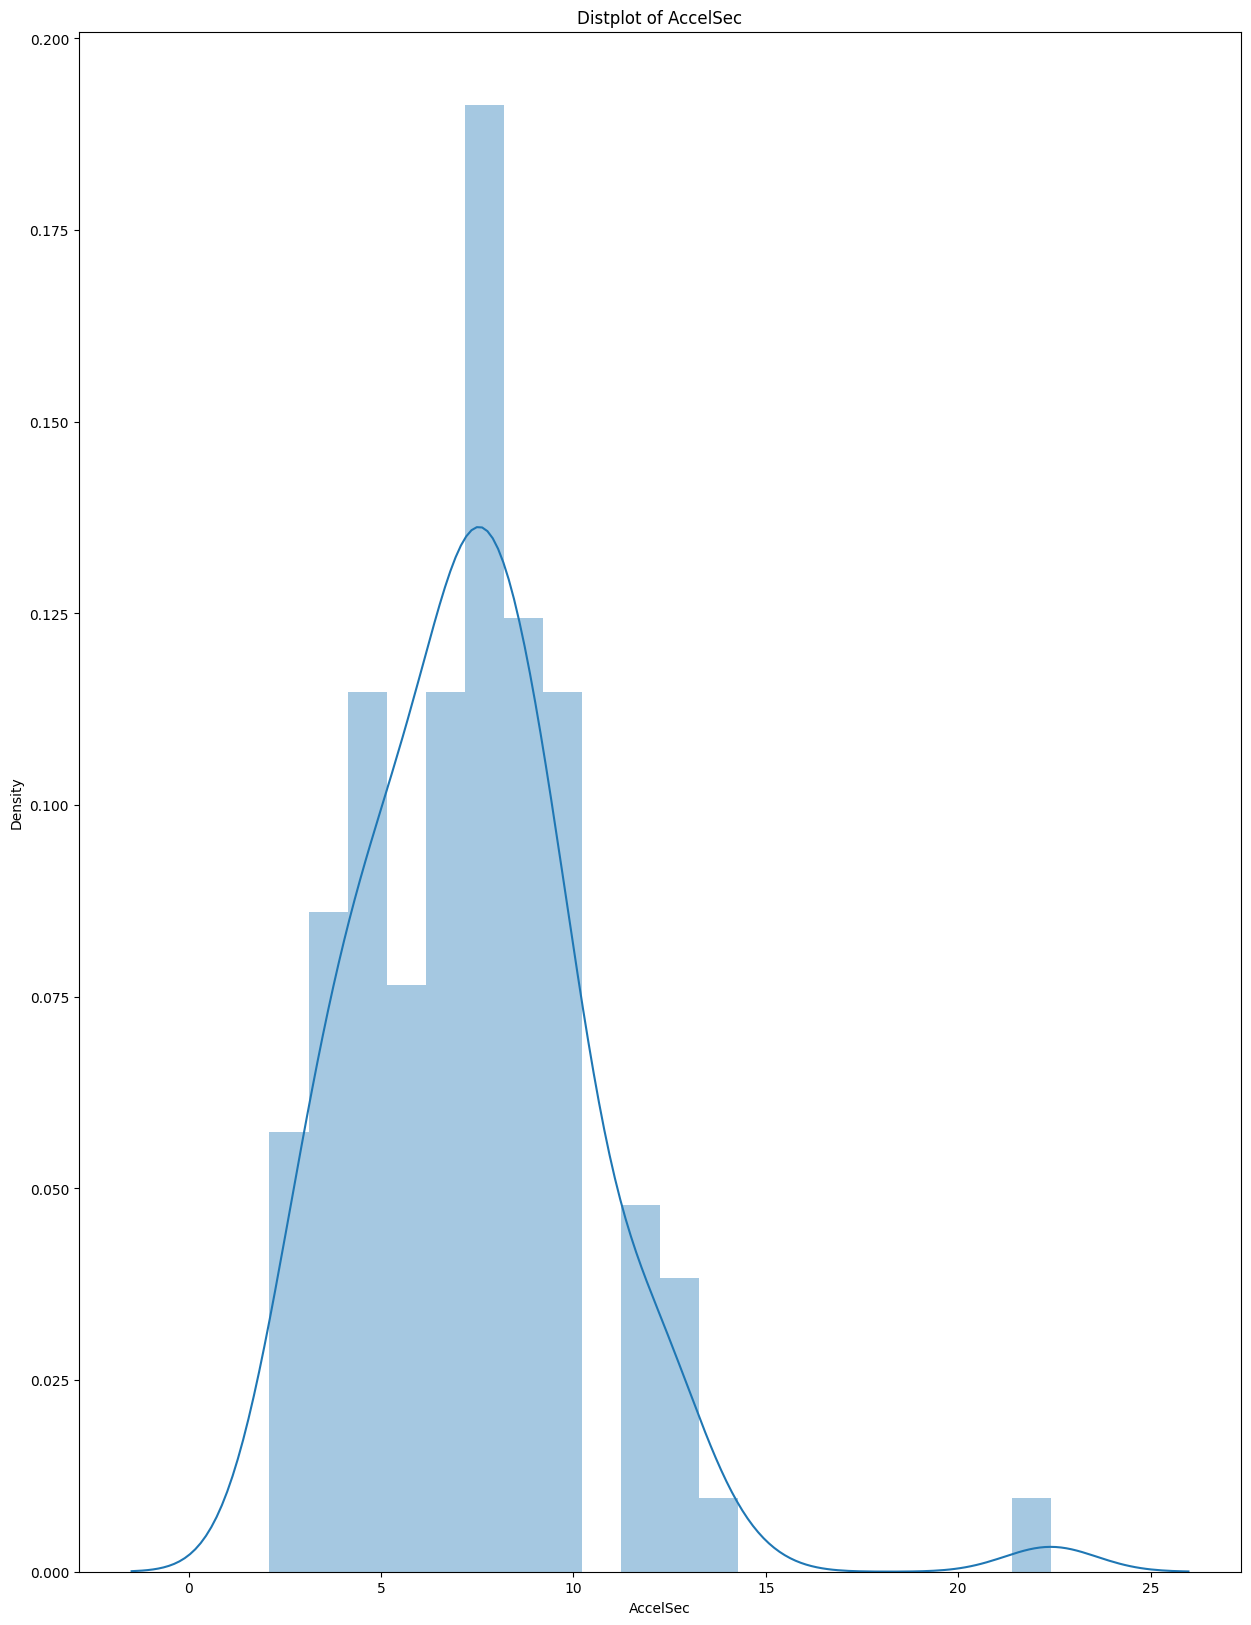

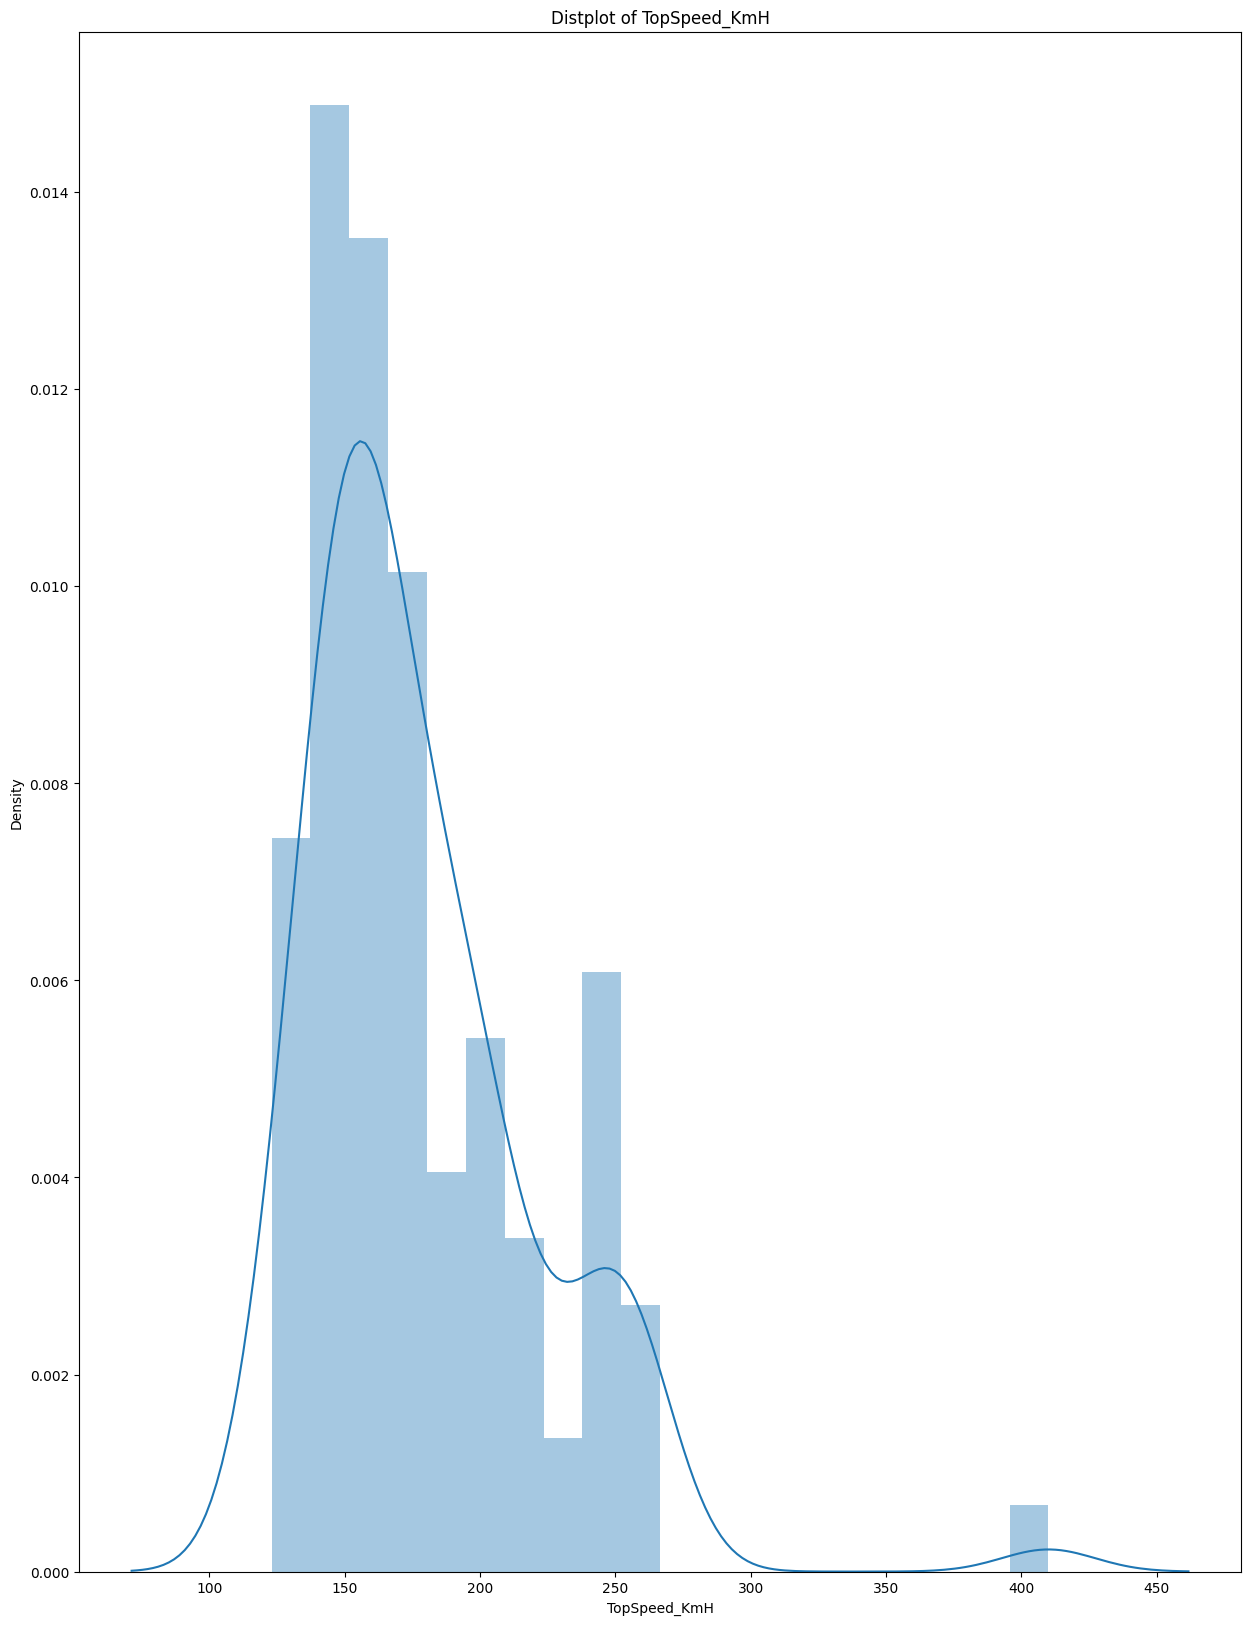

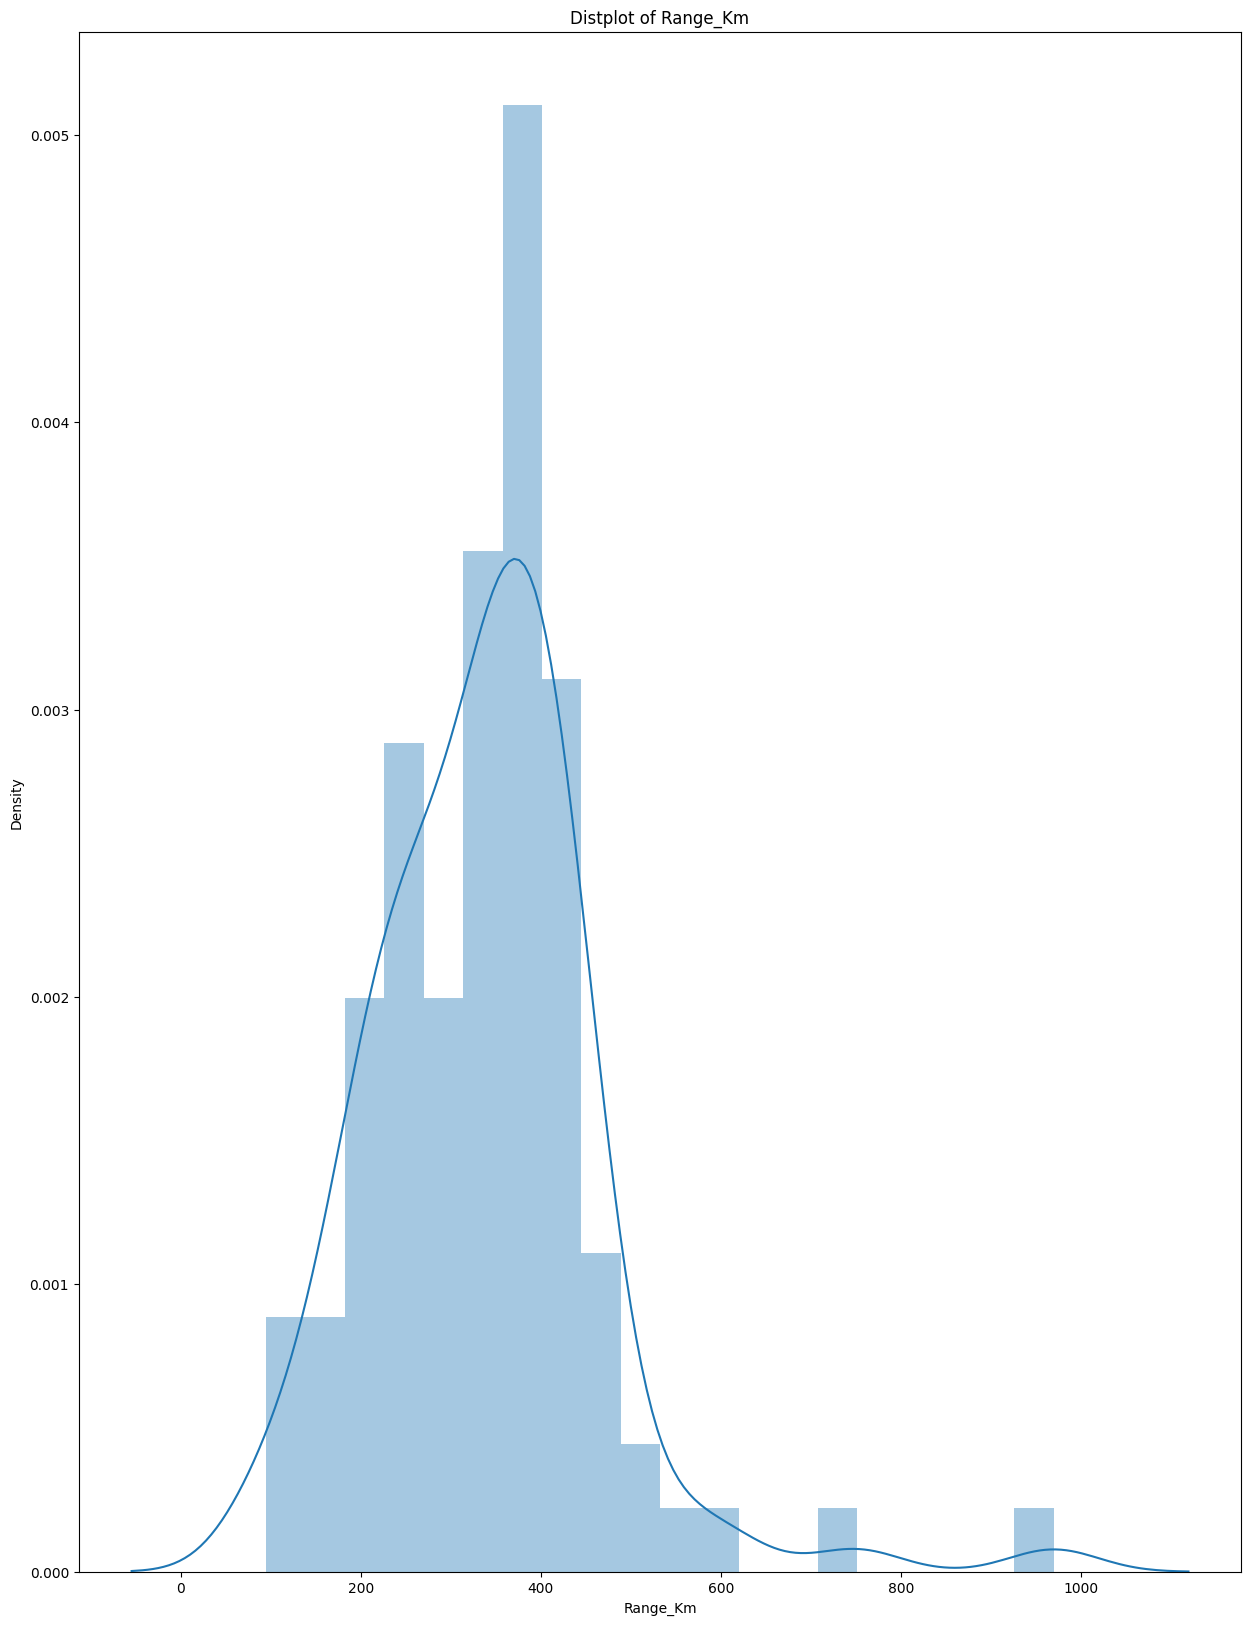

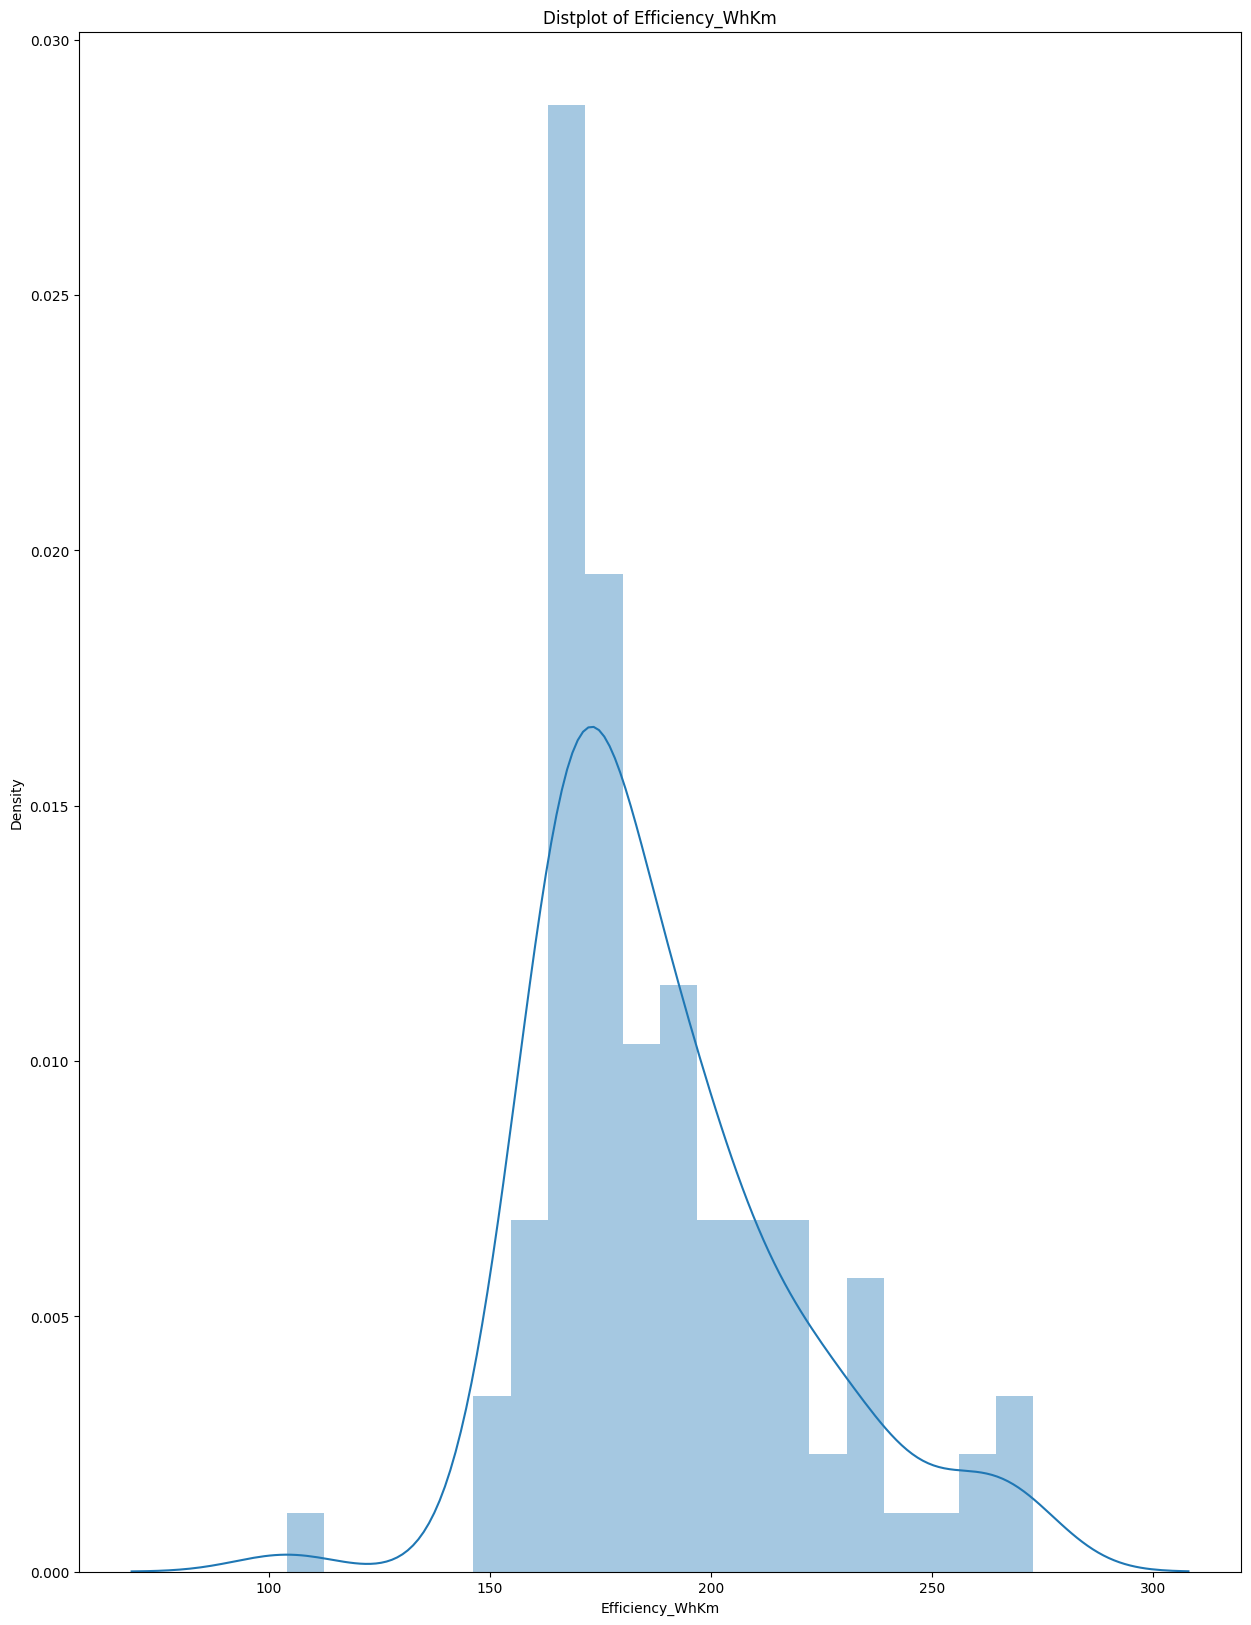

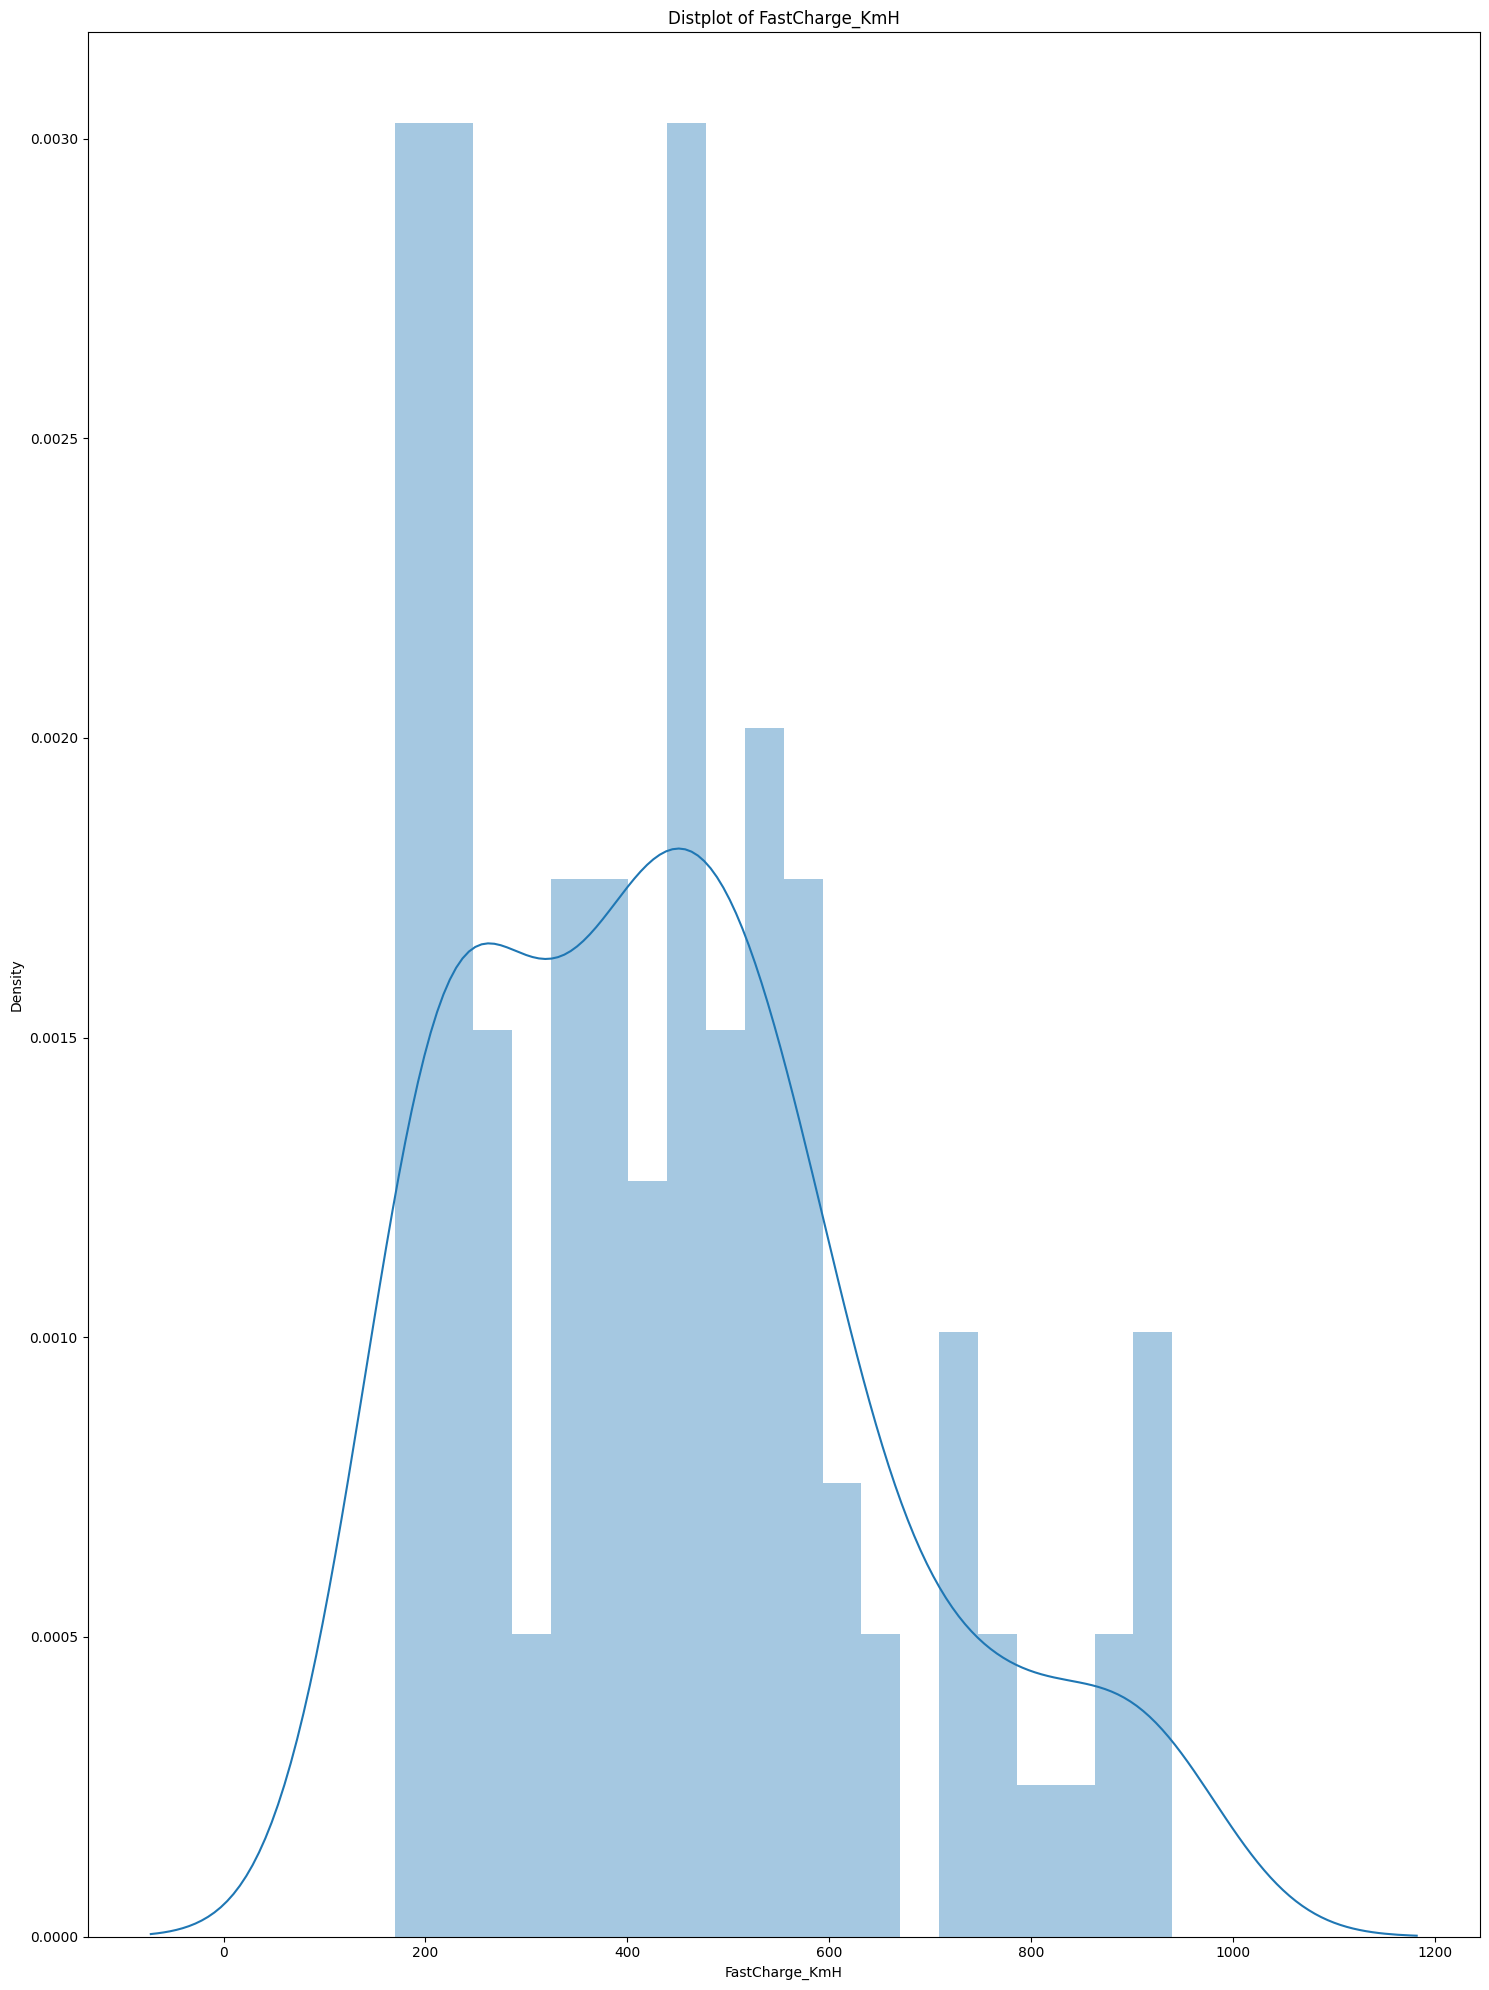

In [10]:
d=['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH']
for i in d:
    plt.figure(figsize=(15,20))
    sns.distplot(df[i], bins=20)
    plt.title('Distplot of {}'.format(i))
plt.tight_layout()
plt.show()    

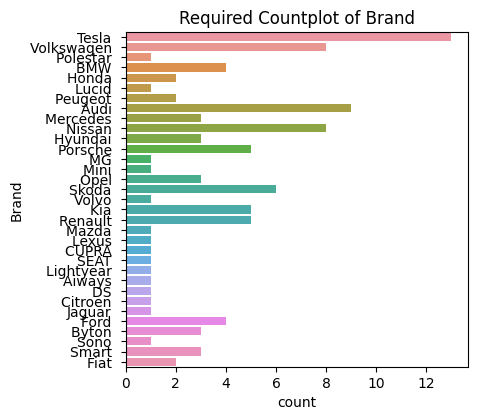

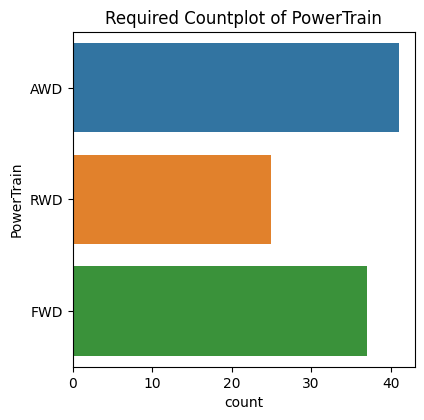

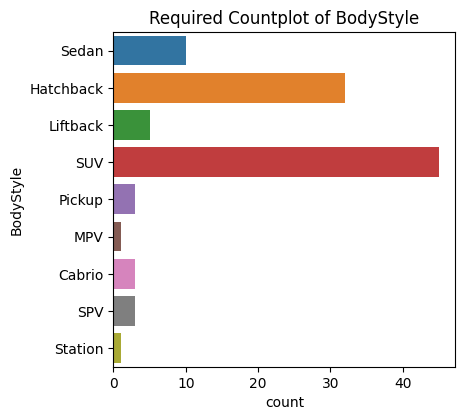

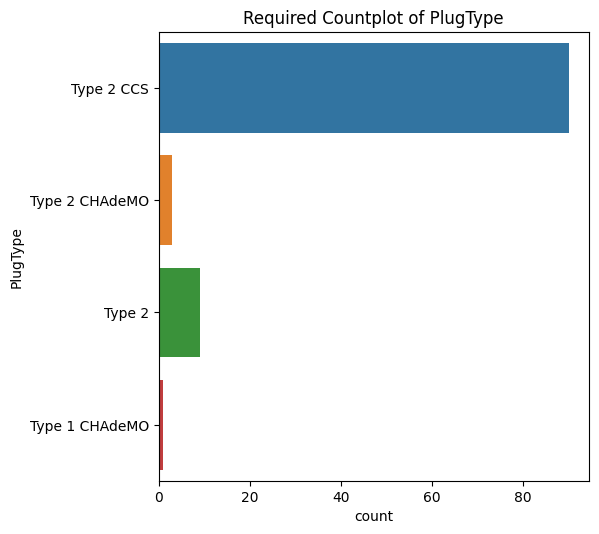

In [11]:
con=['Brand','PowerTrain', 'BodyStyle', 'PlugType']
for i, x in enumerate (con, 1):
    plt.figure(figsize=(15,20))
    plt.subplot(4,3,i)
    sns.countplot(y=x, data=df)
    plt.title('Required Countplot of {}'.format(x))
plt.tight_layout()
plt.show()

In [12]:
plugtype_count = df.groupby(by='PlugType')['Brand'].count()
powertrain_count=df.groupby(by='PowerTrain')['Brand'].count()
bodystyle_count=df.groupby(by='BodyStyle')['Brand'].count()
print(plugtype_count)
print(powertrain_count)
print(bodystyle_count)

PlugType
Type 1 CHAdeMO     1
Type 2             9
Type 2 CCS        90
Type 2 CHAdeMO     3
Name: Brand, dtype: int64
PowerTrain
AWD    41
FWD    37
RWD    25
Name: Brand, dtype: int64
BodyStyle
Cabrio        3
Hatchback    32
Liftback      5
MPV           1
Pickup        3
SPV           3
SUV          45
Sedan        10
Station       1
Name: Brand, dtype: int64


In [13]:
df.head()

,Unnamed: 0,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
col = ['Brand', 'Model', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle', 'Segment']

for feature in col:
    df[feature] = le.fit_transform(df[feature])

df.head()

,Unnamed: 0,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,0,30,46,4.6,233,450,161,940,1,0,2,7,3,5,55480
1,1,31,33,10.0,160,270,167,250,0,2,2,1,2,5,30000
2,2,23,0,4.7,210,400,181,620,1,0,2,2,3,5,56440
3,3,2,101,6.8,180,360,206,560,1,2,2,6,3,5,68040
4,4,9,78,9.5,145,170,168,190,1,2,2,1,1,4,32997


<Axes: >

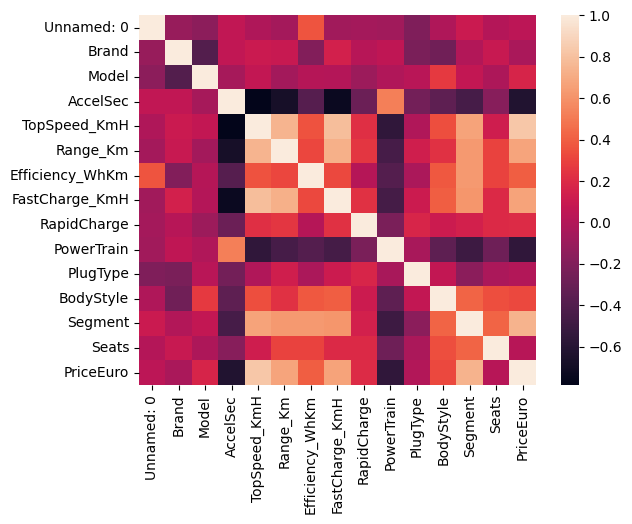

In [15]:
sns.heatmap(df.corr())

In [16]:
rapid_charge=df.groupby(by='RapidCharge')['Model'].count()
rapid_charge

RapidCharge
0    26
1    77
Name: Model, dtype: int64

In [17]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

In [18]:
from sklearn.cluster import KMeans
import wandb
run = wandb.init(project='Electric Vehicle Market Segmentation')
config = wandb.config
config.seed = 0
config.n_clusters = 2
np.random.seed(config.seed)
wandb.config.update(config)

wandb: Currently logged in as: dishaa_s. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.15.12
wandb: Run data is saved locally in /kaggle/working/wandb/run-20231025_075619-101zgzh4
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run magic-grass-50
wandb: ⭐️ View project at https://wandb.ai/dishaa_s/Electric%20Vehicle%20Market%20Segmentation
wandb: 🚀 View run at https://wandb.ai/dishaa_s/Electric%20Vehicle%20Market%20Segmentation/runs/101zgzh4


In [19]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [20]:
data=df.copy()

In [21]:
data.drop('Brand', axis=1, inplace = True)

In [22]:
column=df[df.columns]

In [23]:
kmeans = KMeans(n_clusters = config.n_clusters, random_state = config.seed)
kmeans.fit(column)
wandb.sklearn.plot_clusterer(kmeans, column, cluster_labels = kmeans.fit_predict(column), model_name='KMeans')

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
wandb: 
wandb: Plotting KMeans.
wandb: Logged elbow curve.
wandb: Logged silhouette plot.


In [24]:
run.finish()

wandb: Waiting for W&B process to finish... (success).
wandb: 🚀 View run magic-grass-50 at: https://wandb.ai/dishaa_s/Electric%20Vehicle%20Market%20Segmentation/runs/101zgzh4
wandb: Synced 6 W&B file(s), 2 media file(s), 2 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20231025_075619-101zgzh4/logs


In [25]:
column['clusters'] = kmeans.fit_predict(column)

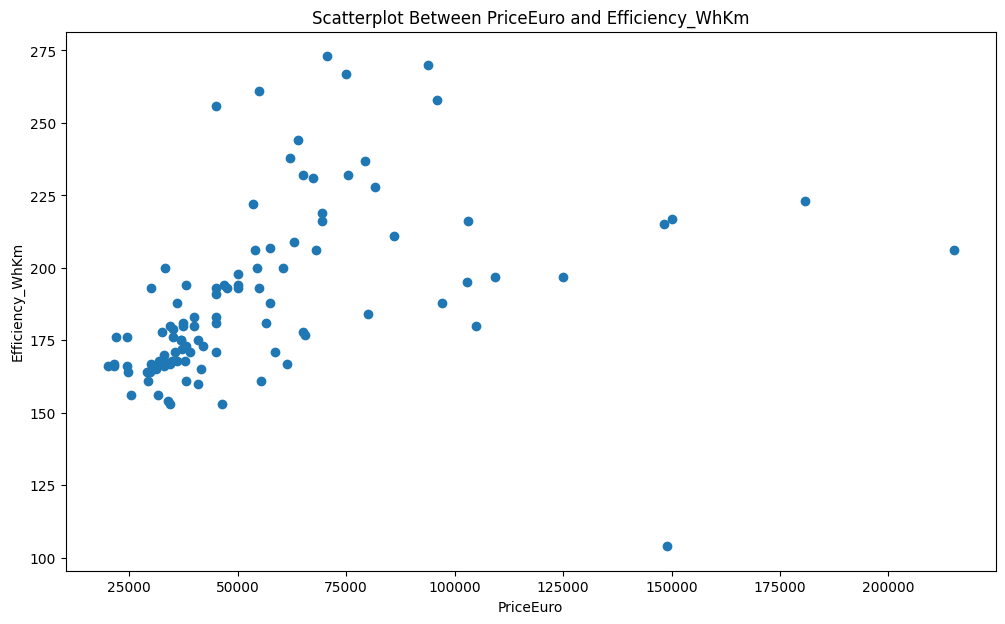

In [26]:
plt.figure(figsize=(12,7))
plt.scatter(x = 'PriceEuro', y = 'Efficiency_WhKm', data = df)
plt.xlabel('PriceEuro')
plt.ylabel('Efficiency_WhKm')
plt.title('Scatterplot Between PriceEuro and Efficiency_WhKm')
plt.show()

In [27]:
print(kmeans.cluster_centers_)

[[1.79777778e+01 4.88444444e+01 7.90666667e+00 1.68955556e+02
  3.19722222e+02 1.86866667e+02 4.08555556e+02 7.22222222e-01
  9.66666667e-01 1.93333333e+00 3.86666667e+00 2.27777778e+00
  4.92222222e+00 4.52603556e+04]
 [1.86153846e+01 6.48461538e+01 3.86153846e+00 2.50076923e+02
  4.70769231e+02 2.05076923e+02 6.91538462e+02 9.23076923e-01
  0.00000000e+00 1.84615385e+00 5.53846154e+00 5.00000000e+00
  4.61538462e+00 1.28858385e+05]]


In [28]:
from sklearn.preprocessing import MinMaxScaler
x = column['PriceEuro'].values.reshape(-1, 1)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
column['PriceEuro']= x_scaled

x = column['Model'].values.reshape(-1, 1)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
column['Model']= x_scaled

x = column['TopSpeed_KmH'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
column['TopSpeed_KmH']= x_scaled

x = column['FastCharge_KmH'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
column['FastCharge_KmH']= x_scaled


x = column['AccelSec'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
column['AccelSec']= x_scaled


x = column['Range_Km'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
column['Range_Km']= x_scaled

column['clusters'] = kmeans.fit_predict(column) 

clustering_kmeans = KMeans(n_clusters=2)
column['clusters'] = clustering_kmeans.fit_predict(column) 

In [29]:
data_for_clustering = df[['FastCharge_KmH', 'PriceEuro', 'RapidCharge', 'PlugType']]

In [30]:
run = wandb.init(project='Electric Vehicle Market Segmentation')
config = wandb.config
config.seed = 42
config.n_clusters = 3
np.random.seed(config.seed)
wandb.config.update(config)
est = KMeans(n_clusters = config.n_clusters, random_state = config.seed)
est.fit(data_for_clustering)
wandb.config.update({'labels' : est.cluster_centers_})
wandb.sklearn.plot_clusterer(est, data_for_clustering, cluster_labels = est.fit_predict(data_for_clustering), model_name='Segmentation based on Charging Infrastructure')
wandb.finish()

wandb: Tracking run with wandb version 0.15.12
wandb: Run data is saved locally in /kaggle/working/wandb/run-20231025_075722-xk0hgtgj
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run expert-darkness-51
wandb: ⭐️ View project at https://wandb.ai/dishaa_s/Electric%20Vehicle%20Market%20Segmentation
wandb: 🚀 View run at https://wandb.ai/dishaa_s/Electric%20Vehicle%20Market%20Segmentation/runs/xk0hgtgj
wandb: 
wandb: Plotting Segmentation based on Charging Infrastructure.
wandb: Logged elbow curve.
wandb: Logged silhouette plot.
wandb: Waiting for W&B process to finish... (success).
wandb: 🚀 View run expert-darkness-51 at: https://wandb.ai/dishaa_s/Electric%20Vehicle%20Market%20Segmentation/runs/xk0hgtgj
wandb: Synced 6 W&B file(s), 2 media file(s), 2 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20231025_075722-xk0hgtgj/logs


Text(0, 0.5, 'FastCharge_KmH')

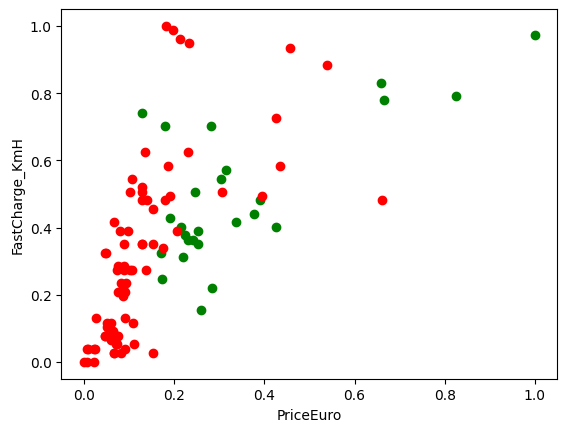

In [31]:
d1 = column[column.clusters==1]
d0 = column[column.clusters==0]
#d2 = column[column.clusters==2]
#d3 = column[column.clusters==3]

plt.scatter(d1.PriceEuro, d1['FastCharge_KmH'],color='green')
plt.scatter(d0.PriceEuro, d0['FastCharge_KmH'],color='red')
#plt.scatter(d2.PriceEuro, d2['Brand'],color='blue')
#plt.scatter(d3.PriceEuro, d3['Model'],color='yellow')

plt.xlabel('PriceEuro')
plt.ylabel('FastCharge_KmH')

In [32]:
clustering_kmeans.cluster_centers_

array([[ 1.93246753e+01,  4.92992156e-01,  2.95630478e-01,
         1.58197203e-01,  2.50686456e-01,  1.75116883e+02,
         3.10001687e-01,  7.40259740e-01,  1.03896104e+00,
         1.92207792e+00,  3.67532468e+00,  2.05194805e+00,
         4.77922078e+00,  1.29979226e-01, -1.11022302e-16],
       [ 1.43076923e+01,  5.35034273e-01,  1.58014399e-01,
         3.07156258e-01,  3.61318681e-01,  2.30769231e+02,
         4.93006993e-01,  7.69230769e-01,  2.69230769e-01,
         1.92307692e+00,  5.26923077e+00,  4.30769231e+00,
         5.19230769e+00,  3.40453428e-01,  1.00000000e+00]])

In [33]:
data2=df[['PriceEuro', 'BodyStyle']]
dat2=data2.copy()
run = wandb.init(project='Electric Vehicle Market Segmentation')
config = wandb.config
config.seed = 42
config.n_clusters = 2
np.random.seed(config.seed)
wandb.config.update(config)
est = KMeans(n_clusters = config.n_clusters, random_state = config.seed)
est.fit(data2)
wandb.config.update({'labels' : est.cluster_centers_})
wandb.sklearn.plot_clusterer(est, data2, cluster_labels = est.fit_predict(data2), model_name='Market Segmentation on basis of Vehicle Type')
wandb.finish()

wandb: Tracking run with wandb version 0.15.12
wandb: Run data is saved locally in /kaggle/working/wandb/run-20231025_075823-4z5f4su3
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run visionary-plant-52
wandb: ⭐️ View project at https://wandb.ai/dishaa_s/Electric%20Vehicle%20Market%20Segmentation
wandb: 🚀 View run at https://wandb.ai/dishaa_s/Electric%20Vehicle%20Market%20Segmentation/runs/4z5f4su3
wandb: 
wandb: Plotting Market Segmentation on basis of Vehicle Type.
wandb: Logged elbow curve.
wandb: Logged silhouette plot.
wandb: Waiting for W&B process to finish... (success).
wandb: 🚀 View run visionary-plant-52 at: https://wandb.ai/dishaa_s/Electric%20Vehicle%20Market%20Segmentation/runs/4z5f4su3
wandb: Synced 6 W&B file(s), 2 media file(s), 2 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20231025_075823-4z5f4su3/logs


In [34]:
clustering_kmeans = KMeans(n_clusters=2)
dat2['clusters'] = clustering_kmeans.fit_predict(dat2)
labels__ = clustering_kmeans.labels_
labels__

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int32)

In [35]:
data3=column.loc[:,["PriceEuro", "AccelSec"]]
dat3=data3.copy()
run = wandb.init(project='Electric Vehicle Market Segmentation')
config = wandb.config
config.seed = 42
config.n_clusters = 2
np.random.seed(config.seed)
wandb.config.update(config)
est = KMeans(n_clusters = config.n_clusters, random_state = config.seed)
est.fit(data3)
wandb.config.update({'labels' : est.cluster_centers_})
wandb.sklearn.plot_clusterer(est, data3, cluster_labels = est.fit_predict(data3), model_name='Market Segmentation on basis of Vehicle Type')
wandb.finish()

wandb: Tracking run with wandb version 0.15.12
wandb: Run data is saved locally in /kaggle/working/wandb/run-20231025_075927-ig0x55wa
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run soft-butterfly-53
wandb: ⭐️ View project at https://wandb.ai/dishaa_s/Electric%20Vehicle%20Market%20Segmentation
wandb: 🚀 View run at https://wandb.ai/dishaa_s/Electric%20Vehicle%20Market%20Segmentation/runs/ig0x55wa
wandb: 
wandb: Plotting Market Segmentation on basis of Vehicle Type.
wandb: Logged elbow curve.
wandb: Logged silhouette plot.
wandb: Waiting for W&B process to finish... (success).
wandb: 🚀 View run soft-butterfly-53 at: https://wandb.ai/dishaa_s/Electric%20Vehicle%20Market%20Segmentation/runs/ig0x55wa
wandb: Synced 6 W&B file(s), 2 media file(s), 2 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20231025_075927-ig0x55wa/logs


In [36]:
clustering_kmeans = KMeans(n_clusters=3)
dat3['clusters'] = clustering_kmeans.fit_predict(dat3)
labels_ = clustering_kmeans.labels_
labels_

array([0, 2, 0, 0, 2, 1, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0,
       2, 1, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2,
       2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 1,
       2, 0, 2, 0, 0, 0, 1, 0, 2, 2, 0, 2, 0, 1, 0, 1, 2, 0, 2, 2, 0, 0,
       0, 2, 1, 2, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0], dtype=int32)

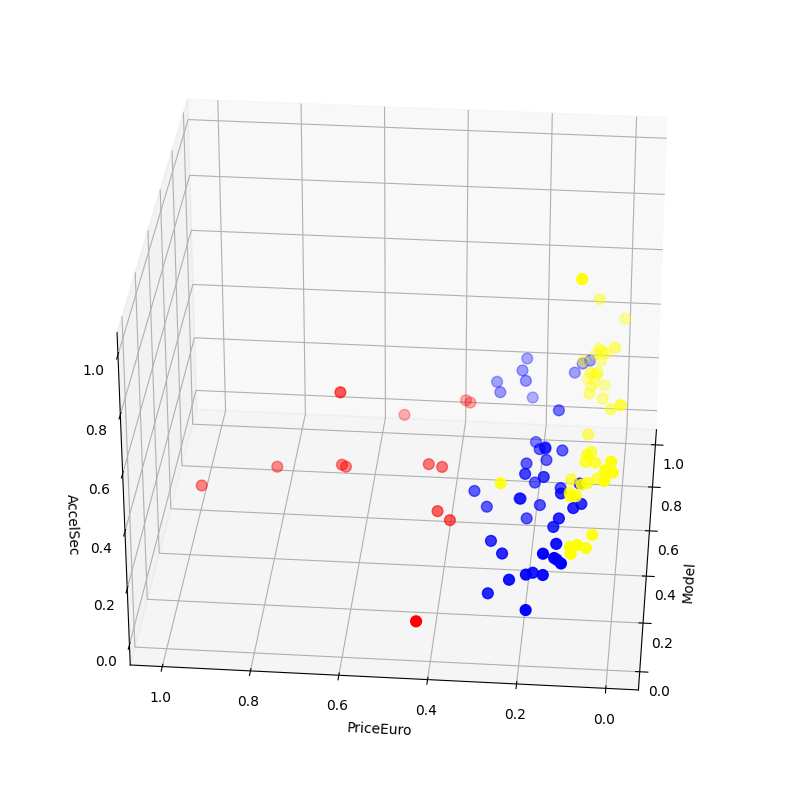

In [37]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(column.Model[labels_ == 0], column["PriceEuro"][labels_ == 0], column["AccelSec"][labels_ == 0],  c='blue', s=60)
ax.scatter(column.Model[labels_ == 1], column["PriceEuro"][labels_ == 1], column["AccelSec"][labels_ == 1],  c='red', s=60)
ax.scatter(column.Model[labels_ == 2], column["PriceEuro"][labels_ == 2], column["AccelSec"][labels_ == 2],  c='yellow', s=60)
#ax.scatter(d.Age[labels == 2], d["Salary"][labels == 2], d["Price"][labels == 2],  c='green', s=60)
ax.view_init(30,185)
plt.xlabel("Model")
plt.ylabel("PriceEuro")
ax.set_zlabel("AccelSec")
plt.show()

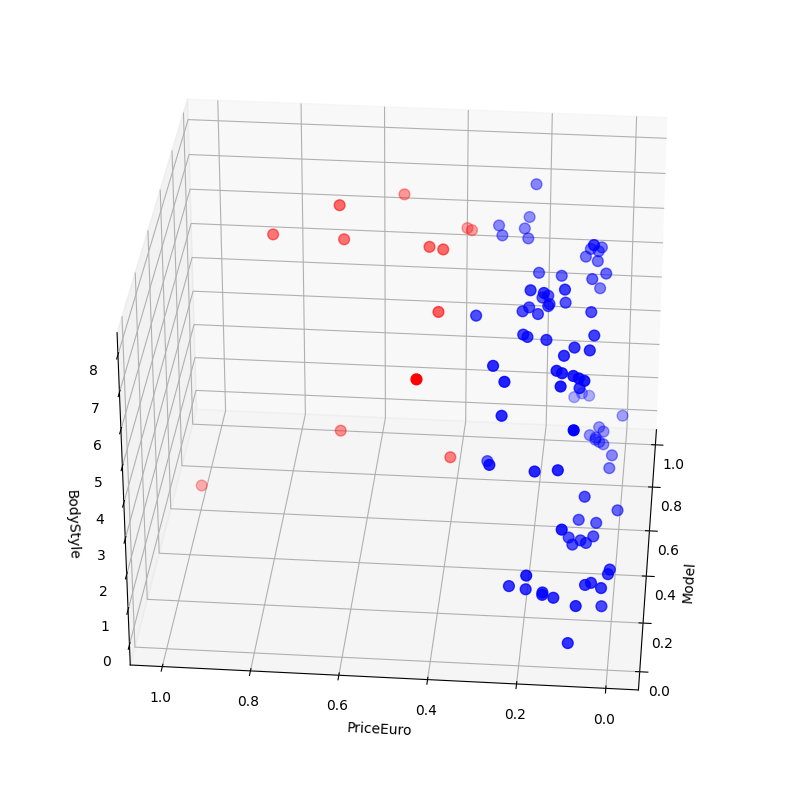

In [38]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(column.Model[labels__ == 0], column["PriceEuro"][labels__ == 0], column["BodyStyle"][labels__ == 0],  c='blue', s=60)
ax.scatter(column.Model[labels__ == 1], column["PriceEuro"][labels__ == 1], column["BodyStyle"][labels__ == 1],  c='red', s=60)
#ax.scatter(d.Age[labels == 2], d["Salary"][labels == 2], d["Price"][labels == 2],  c='green', s=60)
ax.view_init(30,185)
plt.xlabel("Model")
plt.ylabel("PriceEuro")
ax.set_zlabel("BodyStyle")
plt.show()